# Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

# Work Flow
1. Import Libraries
2. Load Data
3. EDA
4. Preprocessing
5. Split the dataset
6. Model Building
7. Model Selection
8. Conclusion

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Models
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Tests
from statsmodels.tsa.stattools import adfuller

# 2. Load the dataset

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# 3. EDA

In [4]:
df.shape

(42, 2)

* There are 42 datapoints are present in this dataset.

In [5]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

* There is no null values are present .

In [6]:
df.duplicated().sum()

0

* There is no duplicates are present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


* Our data type is float and the date column have not assigned as date column.

### Let's convert the date column in right form.

In [8]:
temp_df = df['Quarter'].str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [9]:
df['quater'] = pd.to_datetime(temp_df).dt.strftime('%b-%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   quater   42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [11]:
df.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
df1 = df[['quater','Sales']].copy()

In [13]:
df1.head()

,quater,Sales
0,Jan-1986,1734.827000
1,Apr-1986,2244.960999
2,Jul-1986,2533.804993
3,Oct-1986,2154.962997
4,Jan-1987,1547.818996


In [14]:
df1['quater'] = pd.to_datetime(df1['quater'])

In [15]:
df1.set_index('quater', inplace=True)

In [16]:
df1.head()

,Sales
quater,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [17]:
df1.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='quater', freq=None)

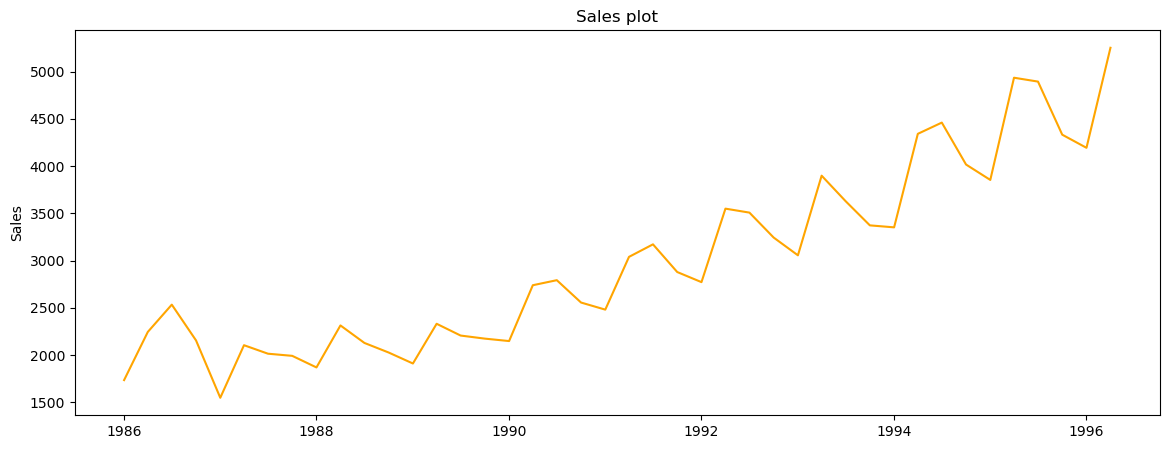

In [18]:
plt.figure(figsize=(14,5))
plt.plot(df1['Sales'], color='orange')
plt.title('Sales plot')
plt.ylabel('Sales')
plt.show()

* We can see there is trend in the dataset.

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

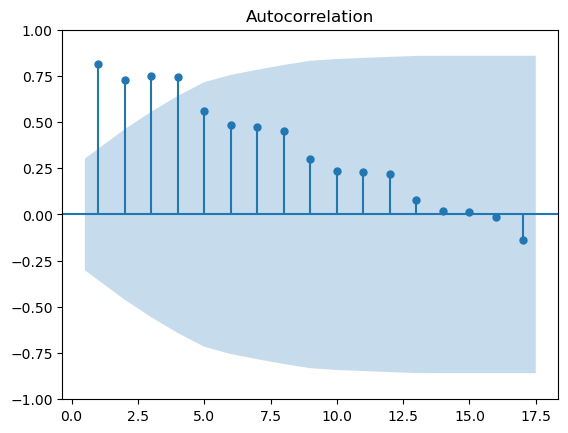

In [20]:
plot_acf(df1['Sales'], zero=False);
plt.show()

* There are 4 perivious values contribute in present value more.

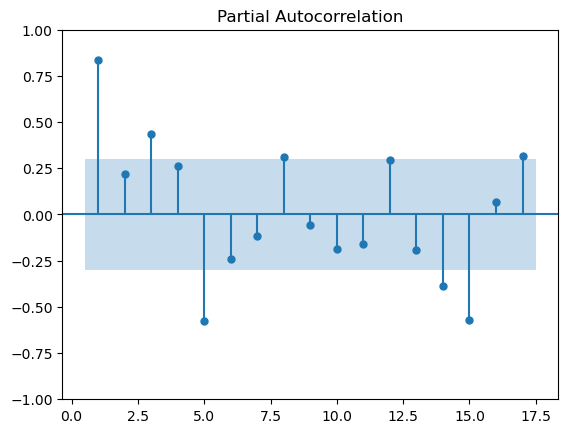

In [21]:
plot_pacf(df1['Sales'], zero=False);
plt.show()

* We can see data is seasonal because it repeats it's patterns

## ETS Decomposition

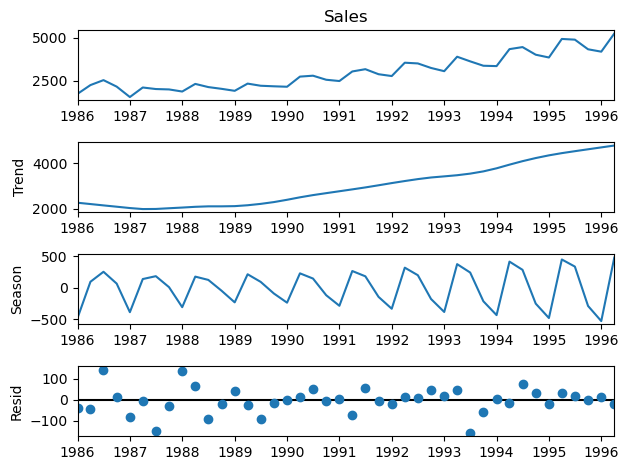

In [22]:
res = STL(df1['Sales']).fit()
res.plot()
plt.show()

# 4. Preprocessing

## Let's check for stationary

In [23]:
adfuller(df1['Sales'])

(1.3094210153268104,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

In [24]:
def test(df):
    p_value = adfuller(df)[0]
    if p_value >= 0.05:
        print('Not Stationary')
    else:
        print('Stationary')

In [25]:
test(df1['Sales'])

Not Stationary


## Let's do differencing

In [26]:
df1['diff_1'] = df1['Sales'] - df1['Sales'].shift(1)

In [27]:
df1.head()

,Sales,diff_1
quater,,
1986-01-01,1734.827000,NaN
1986-04-01,2244.960999,510.133999
1986-07-01,2533.804993,288.843994
1986-10-01,2154.962997,-378.841995
1987-01-01,1547.818996,-607.144001


In [28]:
# Check for stationary
test(df1[['diff_1']].dropna())

Stationary


* After one differencing data becomes stationary.

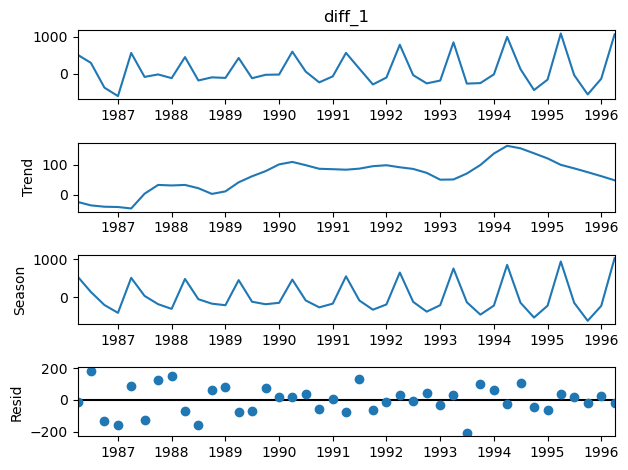

In [29]:
res = STL(df1['diff_1'].dropna()).fit()
res.plot()
plt.show()

* We can see there is slightly upward trend and small seasonality showing after one differencing.
* Let's do second differencing

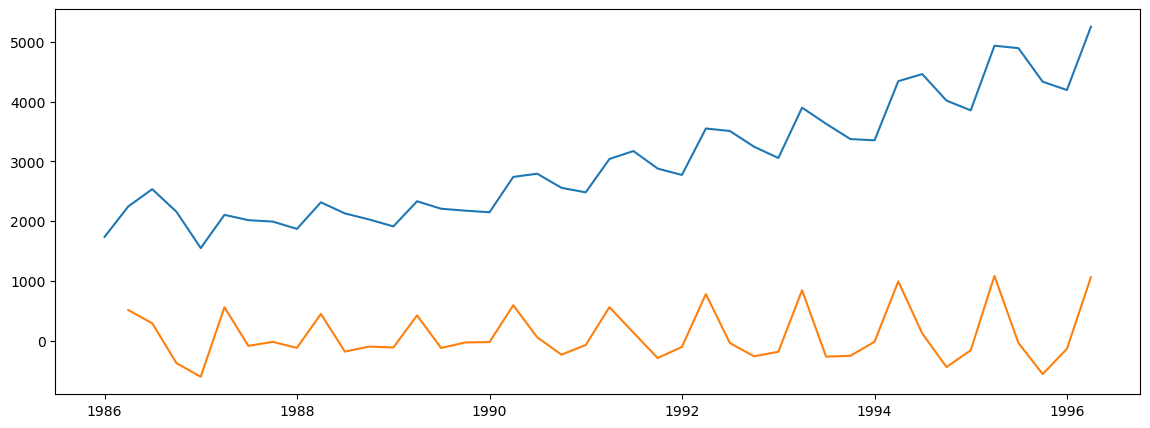

In [30]:
plt.figure(figsize=(14,5))
plt.plot(df1[['Sales','diff_1']])
plt.show()

* After doing first differencing trend gets removed from data.

In [31]:
df1['diff_2'] = df1['diff_1']-df1['diff_1'].shift(1)

In [32]:
test(df1[['diff_2']].dropna())

Stationary


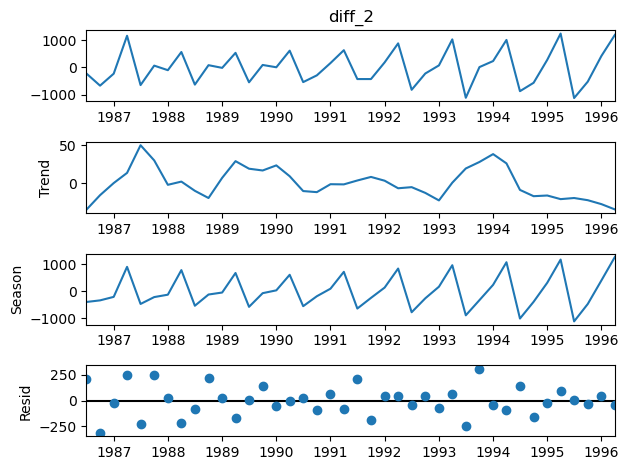

In [33]:
res = STL(df1['diff_2'].dropna()).fit()
res.plot()
plt.show()

* Now there is no trend in dataset.

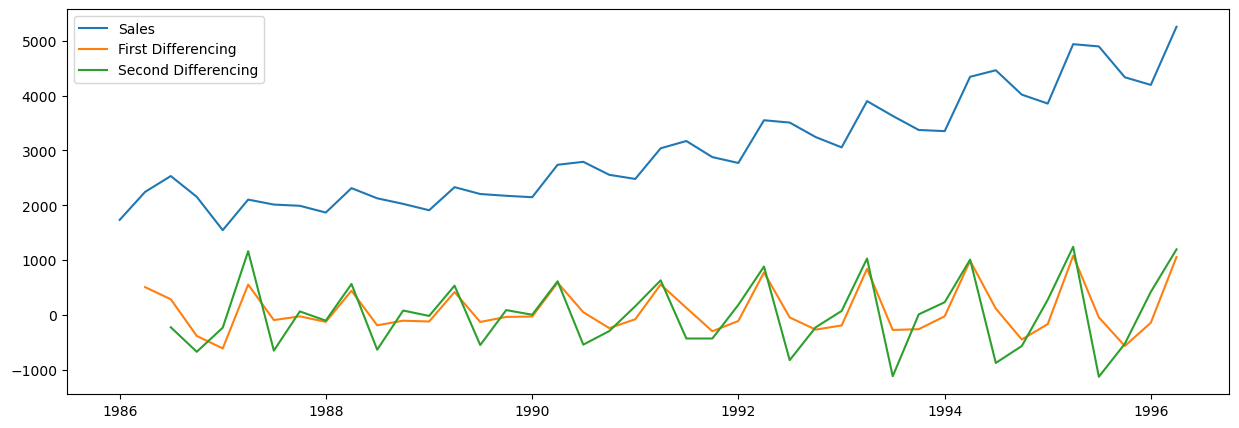

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df1[['Sales', 'diff_1', 'diff_2']])
plt.legend(labels=['Sales','First Differencing','Second Differencing'])
plt.show()

* Now trend is totally removed from data and our data becomes stationary with no trend and no seasonality.

In [35]:
df1 = df1.asfreq('QS')

In [36]:
df1.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='quater', freq='QS-JAN')

In [37]:
df1.dropna(inplace = True)

# 5. Split the dataset

In [38]:
train_len = int(len(df1)*0.75)
test_len = len(df1)-train_len

In [39]:
train_len, test_len

(30, 10)

In [40]:
train_data = df1.iloc[:train_len,:]
test_data = df1.iloc[train_len:,:]

In [41]:
train_data.shape

(30, 3)

In [42]:
test_data.shape

(10, 3)

# 6. Build the Model

## 6.1. AutoRegression

## 6.1.1 AutoRegression with actual data

In [43]:
from statsmodels.tsa.ar_model import AutoReg

In [44]:
model = AutoReg(train_data['Sales'], lags=4).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

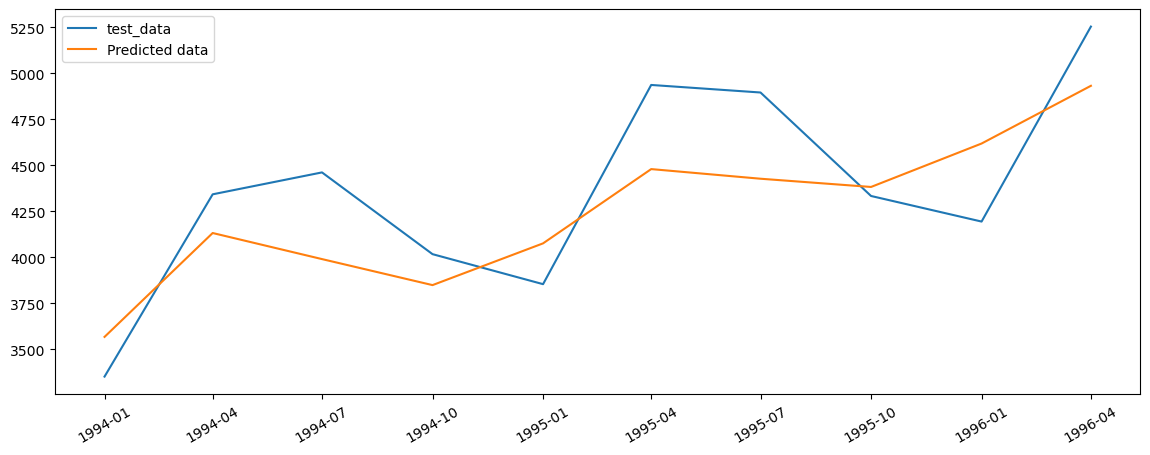

In [45]:
plt.figure(figsize=(14,5))
plt.plot(test_data['Sales'], label='test_data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.xticks(rotation=30)
plt.show()

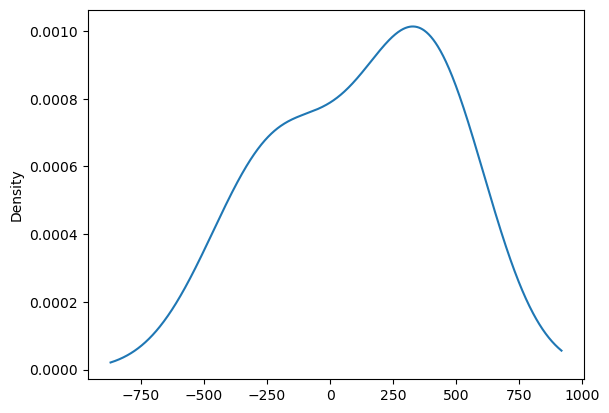

In [46]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.show()

In [48]:
mae_ar_act = mean_absolute_error(test_data['Sales'],pred)
rmse_ar_actual = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_ar_act, rmse_ar_actual

(300.6124150420297, 332.1707538763825)

## 6.1.2. AutoRegression with First differencing data

In [49]:
model = AutoReg(train_data['diff_1'], lags=4).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

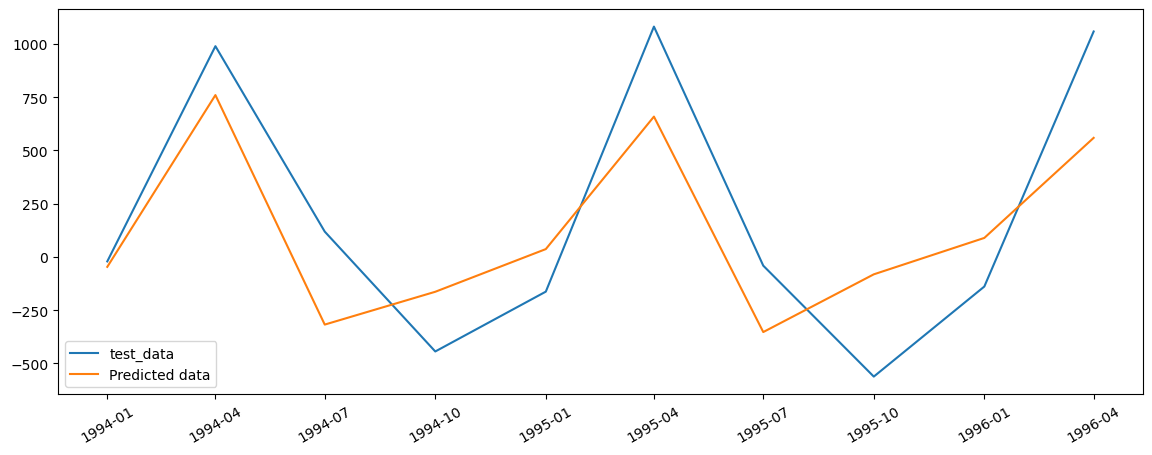

In [50]:
plt.figure(figsize=(14,5))
plt.plot(test_data['diff_1'], label='test_data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.xticks(rotation=30)
plt.show()

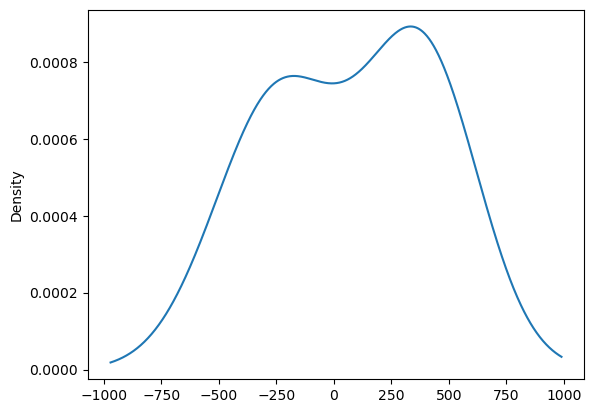

In [51]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.show()

In [53]:
mae_ar_diff_1 = mean_absolute_error(test_data['diff_1'],pred)
rmse_ar_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_ar_diff_1, rmse_ar_diff_1

(311.5250903658393, 342.2360174103369)

## 6.1.3. AutoRegression with Second Differencing Data

In [54]:
model = AutoReg(train_data['diff_2'], lags=4).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

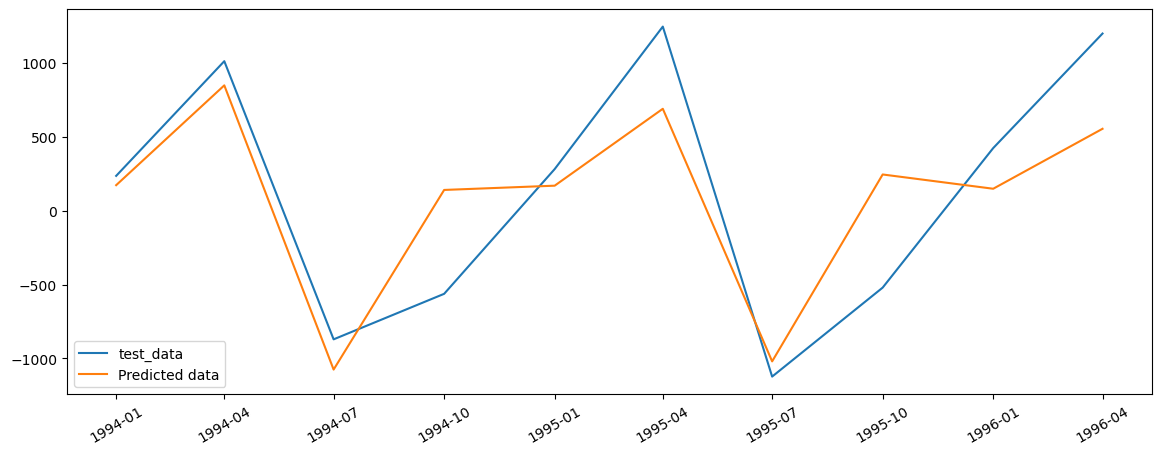

In [55]:
plt.figure(figsize=(14,5))
plt.plot(test_data['diff_2'], label='test_data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.xticks(rotation=30)
plt.show()

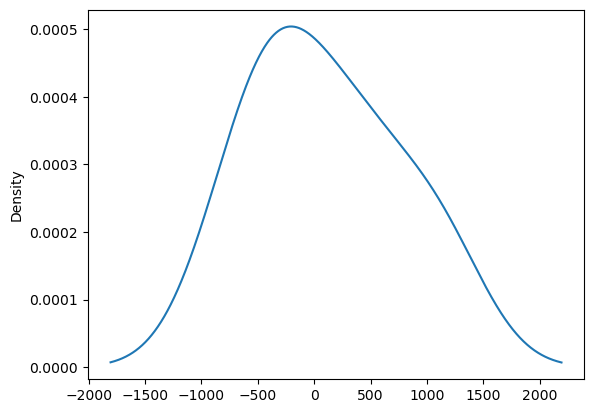

In [56]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.show()

In [57]:
mae_ar_diff_2 = mean_absolute_error(test_data['diff_2'],pred)
rmse_ar_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_ar_diff_2, rmse_ar_diff_2

(359.02852048669524, 444.50503619553365)

## 6.2. Simple Exponential Smoothing

## 6.2.1 Simple Exponential Smoothing with actual data

In [61]:
ses = SimpleExpSmoothing(train_data['Sales']).fit(smoothing_level=0.2)
pred = ses.forecast(test_len)

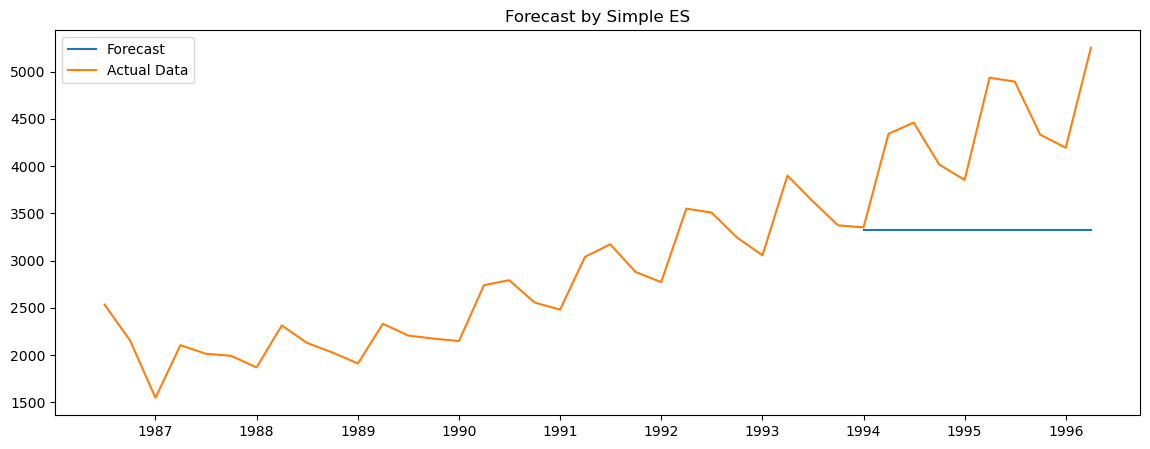

In [62]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['Sales'],label='Actual Data')
plt.title('Forecast by Simple ES')
plt.legend()
plt.show()

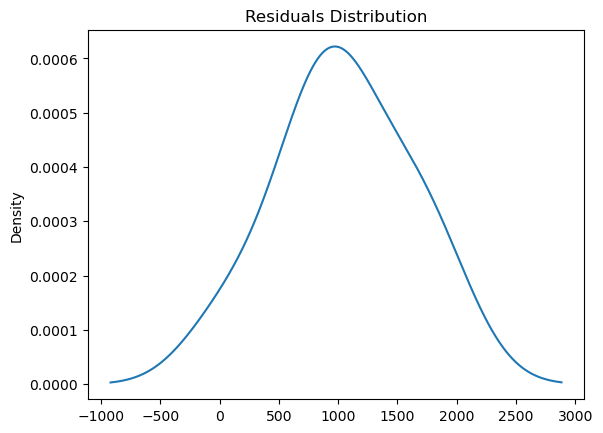

In [63]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [65]:
mae_ses_a_act = mean_absolute_error(test_data['Sales'], pred)
rmse_ses_a_act = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_ses_a_act, rmse_ses_a_act

(1043.7401866039097, 1172.0839505478966)

## 6.2.2 Simple Exponential Smoothing with First Differencing

In [66]:
ses = SimpleExpSmoothing(train_data['diff_1']).fit(smoothing_level=0.2)
pred = ses.forecast(test_len)

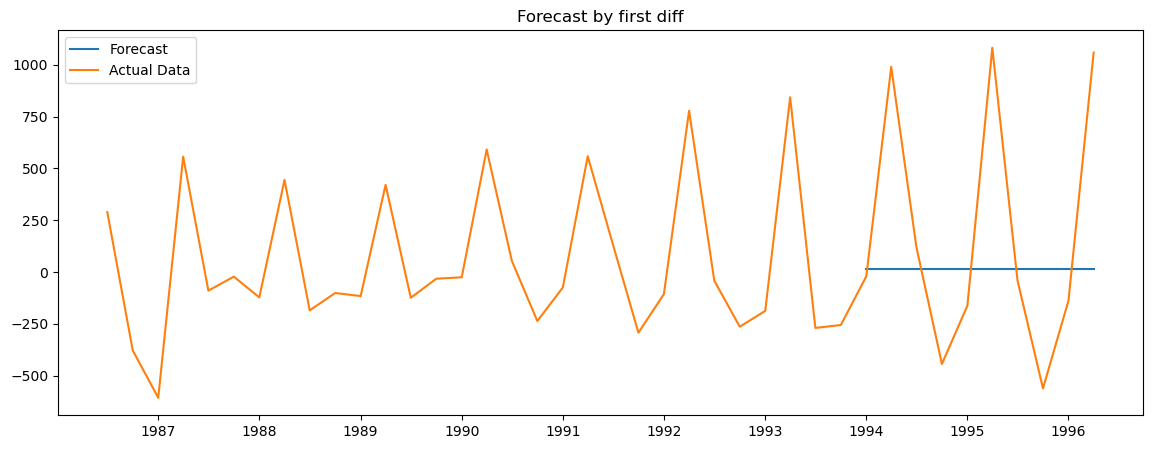

In [67]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['diff_1'],label='Actual Data')
plt.title('Forecast by first diff')
plt.legend()
plt.show()

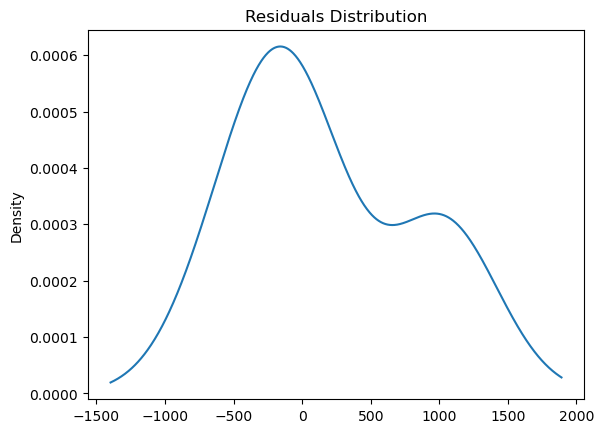

In [68]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [69]:
mae_ses_a_diff_1 = mean_absolute_error(test_data['diff_1'], pred)
rmse_ses_a_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_ses_a_diff_1, rmse_ses_a_diff_1

(464.6399816482629, 616.406417940992)

## 6.2.3 Simple Exponential Smoothing with Second Differencing data

In [70]:
ses = SimpleExpSmoothing(train_data['diff_2']).fit(smoothing_level=0.2)
pred = ses.forecast(test_len)

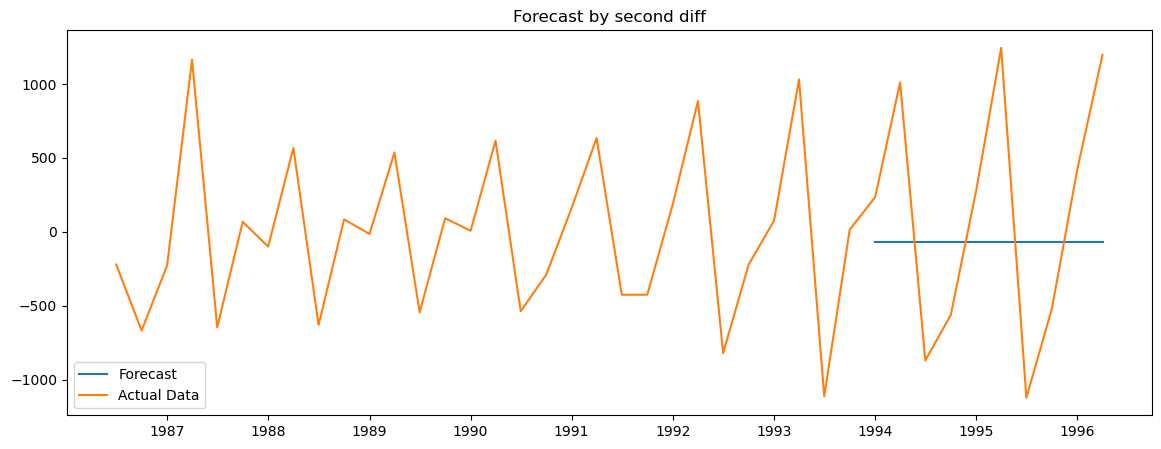

In [71]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['diff_2'],label='Actual Data')
plt.title('Forecast by second diff')
plt.legend()
plt.show()

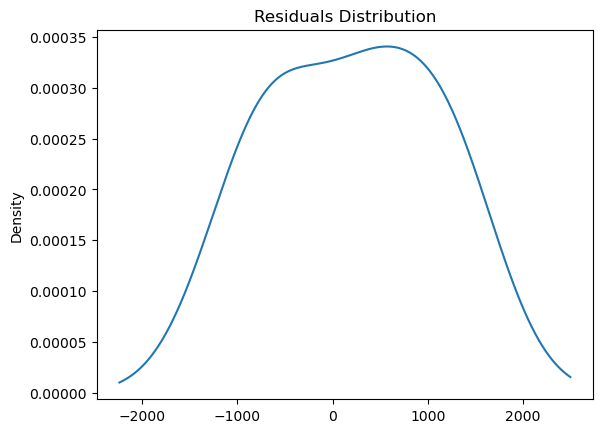

In [72]:
residuals = test_data['diff_2'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [73]:
mae_ses_a_diff_2 = mean_absolute_error(test_data['diff_2'], pred)
rmse_ses_a_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_ses_a_diff_2, rmse_ses_a_diff_2

(760.6192732599991, 845.701846441086)

## 6.3. Double Exponential Smoothing with Additive trend

## 6.3.1. Double Exponential Smoothing with Additive trend and Actual data

In [74]:
ses = ExponentialSmoothing(train_data['Sales'], trend = 'add').fit()
pred = ses.forecast(test_len)

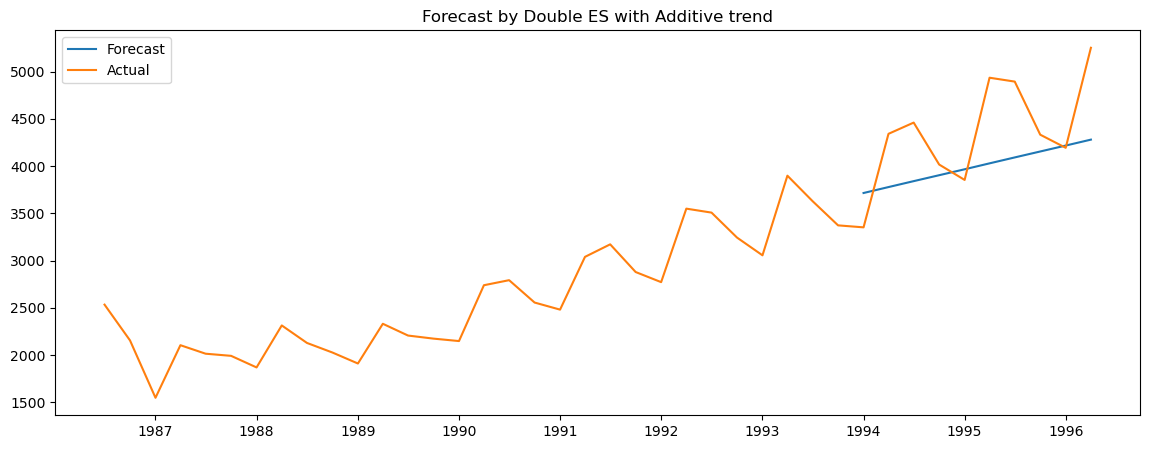

In [75]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['Sales'],label='Actual')
plt.title('Forecast by Double ES with Additive trend')
plt.legend()
plt.show()

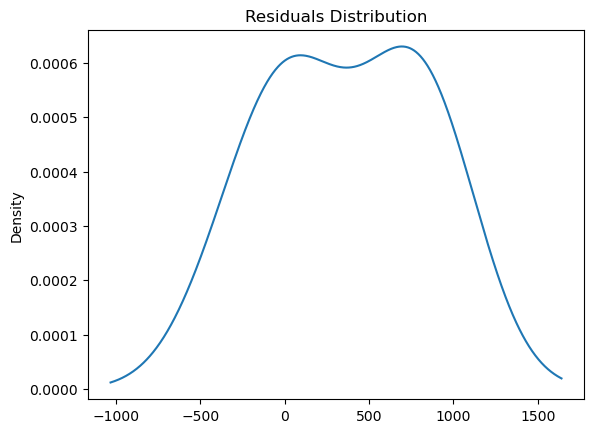

In [76]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [77]:
mae_des_a_actual = mean_absolute_error(test_data['Sales'], pred)
rmse_des_a_actual = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_des_a_actual, rmse_des_a_actual

(465.6081728766767, 574.7315171189325)

## 6.3.2 Double Exponential Smoothing with Additive trend and First Differencing Data

In [78]:
ses = ExponentialSmoothing(train_data['diff_1'], trend = 'add').fit()
pred = ses.forecast(test_len)

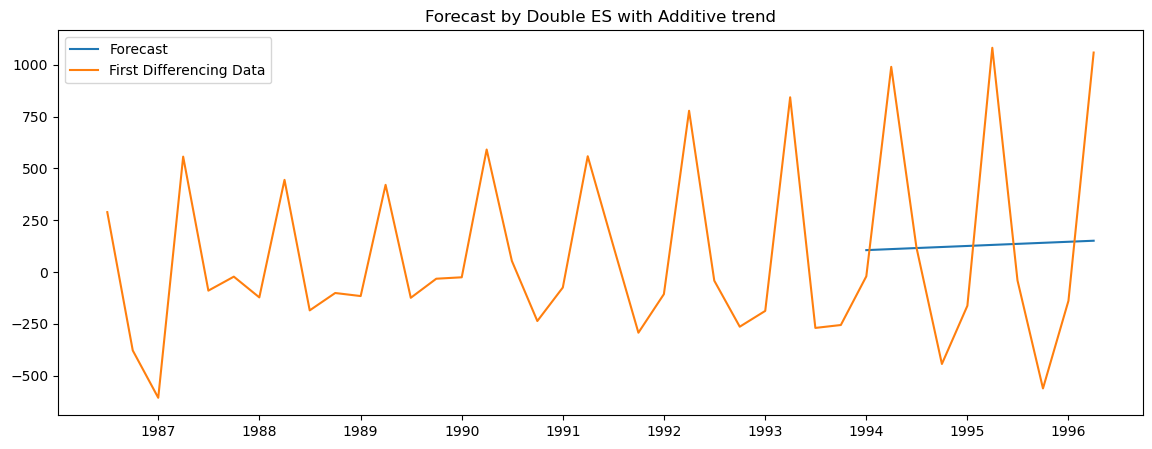

In [79]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['diff_1'],label='First Differencing Data')
plt.title('Forecast by Double ES with Additive trend')
plt.legend()
plt.show()

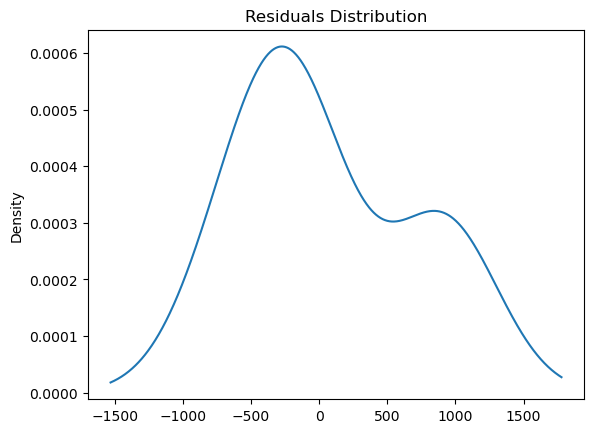

In [80]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [81]:
mae_des_a_diff1 = mean_absolute_error(test_data['diff_1'], pred)
rmse_des_a_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_des_a_diff1, rmse_des_a_diff_1

(488.62836227732305, 593.9384467485694)

## 6.3.2 Double Exponential Smoothing with Additive trend and Second Differencing Data

In [82]:
ses = ExponentialSmoothing(train_data['diff_2'], trend = 'add').fit()
pred = ses.forecast(test_len)

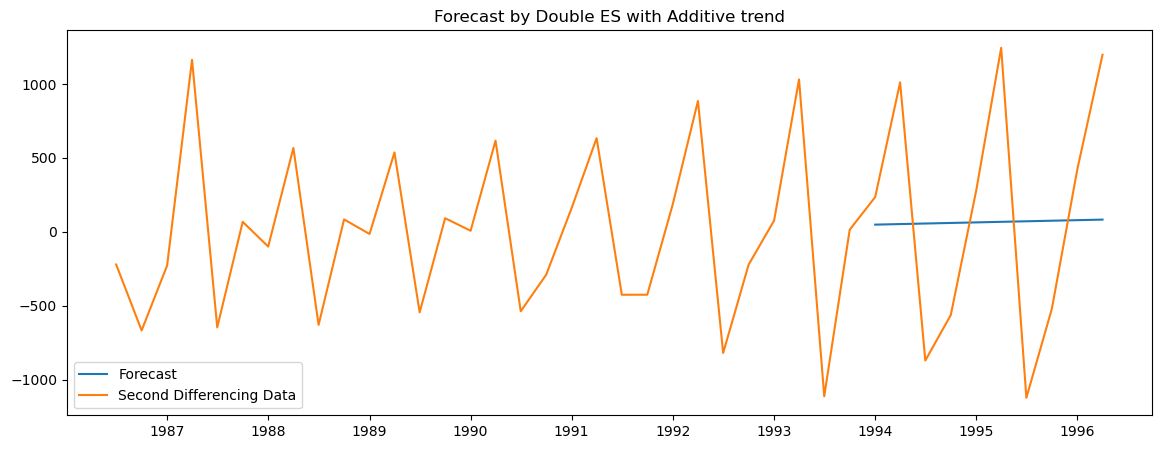

In [83]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['diff_2'], label='Second Differencing Data')
plt.title('Forecast by Double ES with Additive trend')
plt.legend()
plt.show()

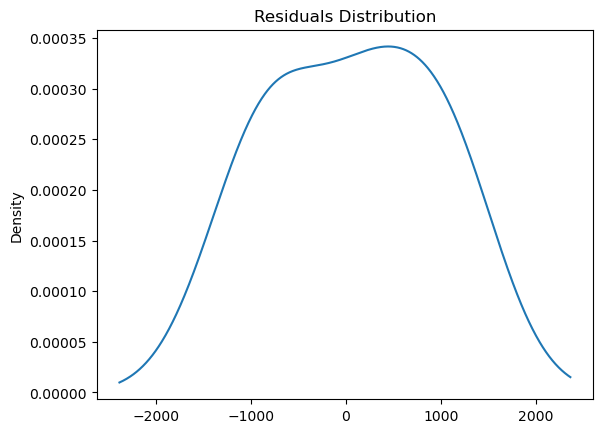

In [84]:
residuals = test_data['diff_2'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [85]:
mae_des_a_diff_2 = mean_absolute_error(test_data['diff_2'], pred)
rmse_des_a_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_des_a_diff_2, rmse_des_a_diff_2

(734.0043122253943, 823.3686450960673)

## 6.4. Double Exponential Smoothing with Multiplicative trend

In [86]:
tse = ExponentialSmoothing(train_data['Sales'], trend = 'mul').fit()
pred = tse.forecast(test_len)

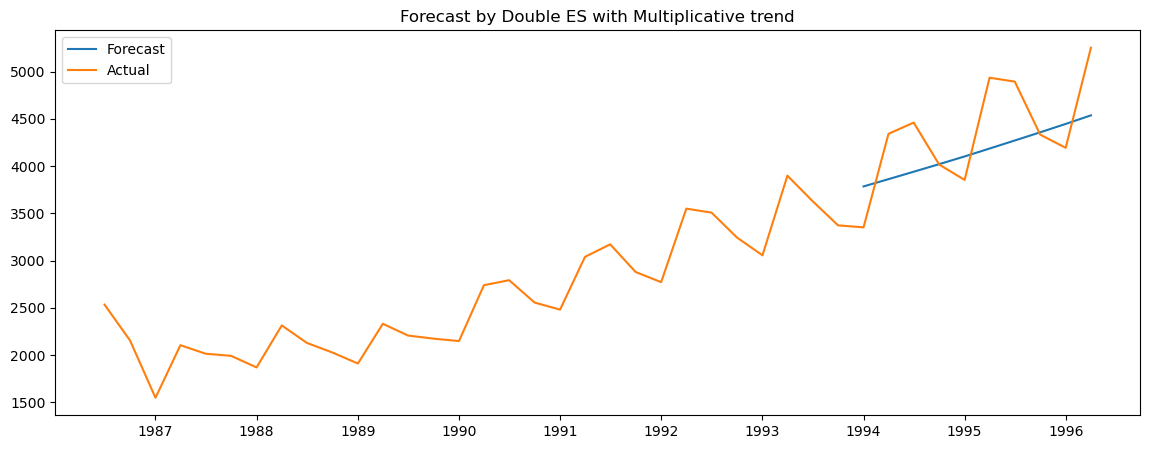

In [87]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['Sales'], label='Actual')
plt.title('Forecast by Double ES with Multiplicative trend')
plt.legend()
plt.show()

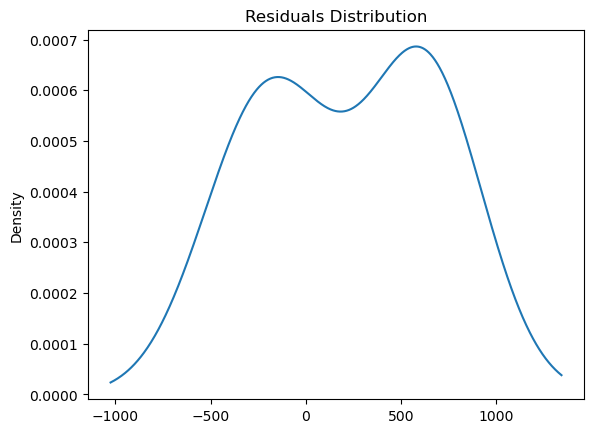

In [88]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [89]:
mae_tse_m_actual = mean_absolute_error(test_data['Sales'], pred)
rmse_tse_m_actual = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_tse_m_actual, rmse_tse_m_actual

(405.3130693614527, 477.29486329607363)

## 6.5. Triple Exponential Smoothing

## 6.5.1. Triple Exponential Smoothing with Additive trend & seasonal and actual data 

In [90]:
tse_a_a = ExponentialSmoothing(train_data['Sales'], trend = 'add', seasonal = 'add').fit()
pred = tse_a_a.forecast(test_len)

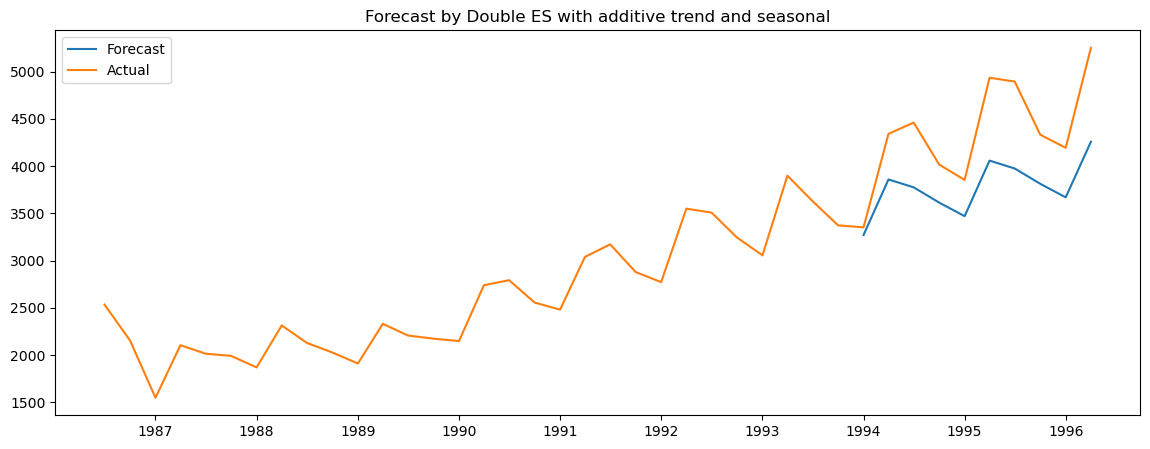

In [91]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast')
plt.plot(df1['Sales'], label='Actual')
plt.title('Forecast by Double ES with additive trend and seasonal')
plt.legend()
plt.show()

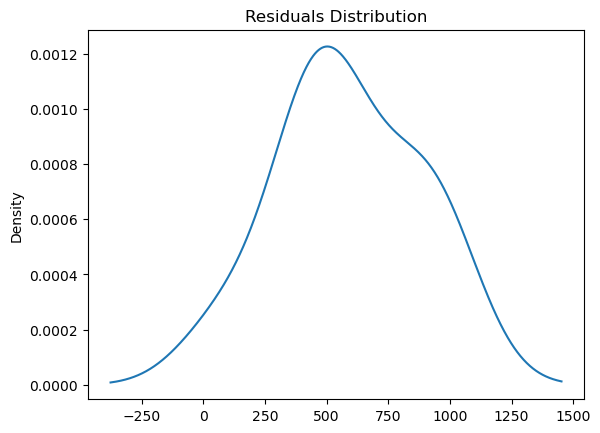

In [92]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [93]:
mae_tse_a_a_actual = mean_absolute_error(test_data['Sales'], pred)
rmse_tse_a_a_actual = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_tse_a_a_actual, rmse_tse_a_a_actual

(587.241589693682, 645.8449394029484)

## 6.5.2. Triple Exponential Smoothing with Additive trend & seasonal and First Differencing Data

In [94]:
tse_a_a = ExponentialSmoothing(train_data['diff_1'], trend = 'add', seasonal = 'add').fit()
pred = tse_a_a.forecast(test_len)

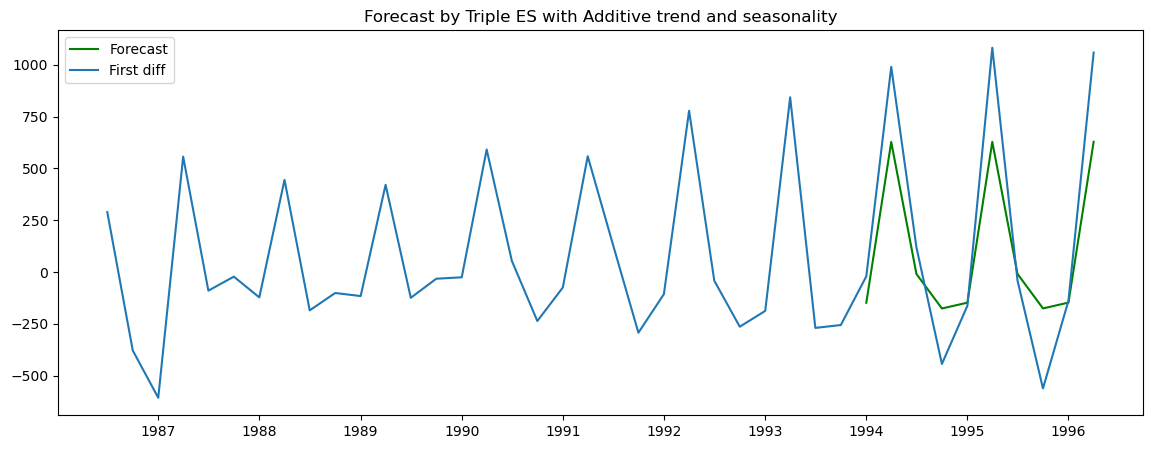

In [95]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast',color='green')
plt.plot(df1['diff_1'], label='First diff')
plt.title('Forecast by Triple ES with Additive trend and seasonality')
plt.legend()
plt.show()

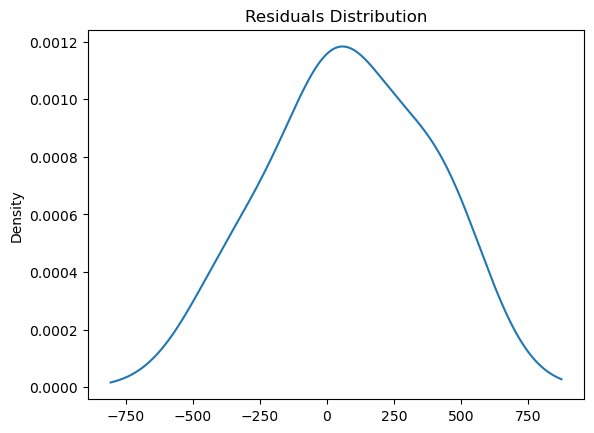

In [96]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [97]:
mae_tes_a_a_diff_1 = mean_absolute_error(test_data['diff_1'],pred)
rmse_tse_a_a_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_tes_a_a_diff_1, rmse_tse_a_a_diff_1

(221.23861989634807, 278.8886647461533)

## 6.5.3. Triple Exponential Smoothing with Additive trend & seasonal and Second Differencing Data

In [98]:
tse_a_a = ExponentialSmoothing(train_data['diff_2'], trend = 'add', seasonal = 'add').fit()
pred = tse_a_a.forecast(test_len)

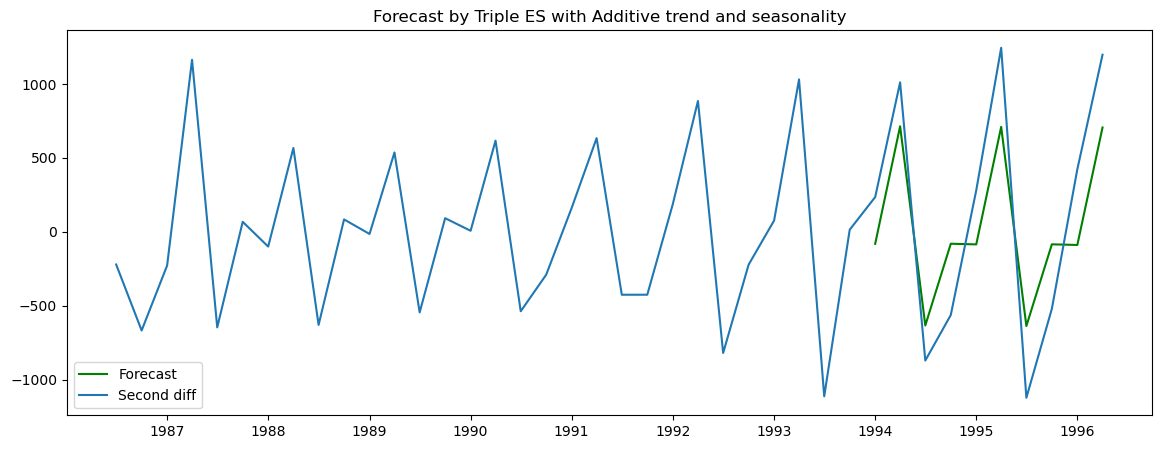

In [99]:
plt.figure(figsize=(14,5))
plt.plot(pred, label='Forecast', color='green')
plt.plot(df1['diff_2'], label='Second diff')
plt.title('Forecast by Triple ES with Additive trend and seasonality')
plt.legend()
plt.show()

In [100]:
mae_tes_a_a_diff_2 = mean_absolute_error(test_data['diff_2'],pred)
rmse_tse_a_a_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_tes_a_a_diff_2, rmse_tse_a_a_diff_2

(416.0738070370704, 427.6112420647153)

# Auto Arima

In [95]:
stepwise_fit = auto_arima(df1['Sales'], start_p = 1, start_q = 1,
                          max_p = 6, max_q = 6, m = 5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',    # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=536.455, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=537.163, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=536.031, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=529.282, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=517.942, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=514.247, Time=0.27 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(2,1,2)[5]             : AIC=515.768, Time=0.28 sec
 ARIMA(1,1,0)(1,1,2)[5]             : AIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(2,1,1)[5]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(

In [96]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 5)   Log Likelihood                -245.457
Date:                           Tue, 11 Jul 2023   AIC                            502.914
Time:                                   11:36:18   BIC                            512.072
Sample:                               07-01-1986   HQIC                           506.037
                                    - 04-01-1996                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.1618      5.047      5.382      0.000      17.270      37.054
ma.L1         -0.9708      1.827     -0.531      0.595      -4.552       2.611
ar.S.L5       -0.1484      0.379     -0.392      0.695      -0.891       0.594
ar.S.L10      -0.6823      0.229     -2.986      0.003      -1.130      -0.234
ma.S.L5       -0.9143      1.890     -0.484      0.629      -4.619       2.790
sigma2      5.984e+04   1.36e+05      0.439      0.661   -2.07e+05    3.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.26   Prob(JB):                         0.73
Heteroskedasticity (H):               3.84   Skew:                            -0.32
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 6.6. ARIMA Model

## 6.6.1. ARIMA with Actual Data

In [101]:
model = ARIMA(train_data['Sales'], order=(0,1,1)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

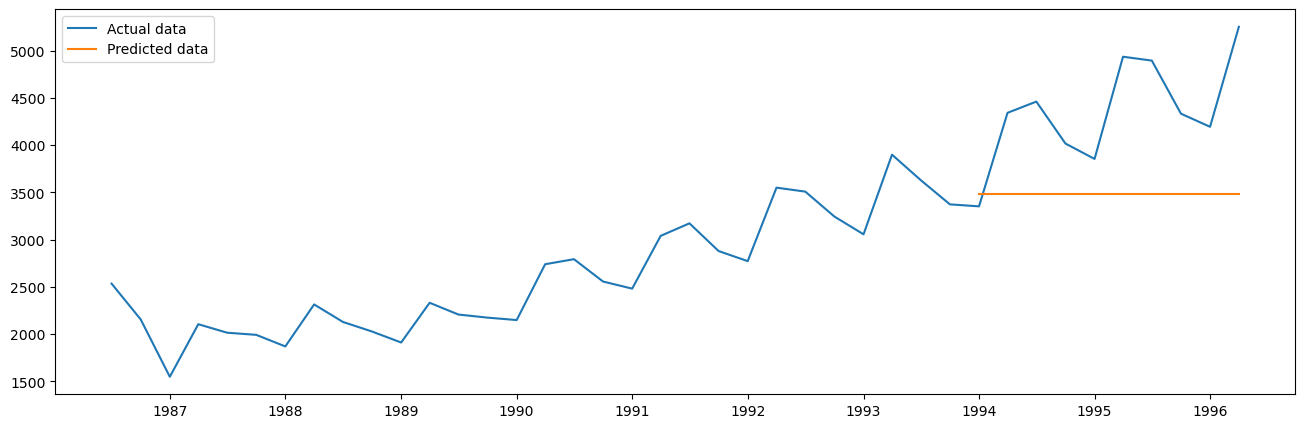

In [102]:
plt.figure(figsize=(16,5))
plt.plot(df1['Sales'],label='Actual data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

In [105]:
mae_arima_actual = mean_absolute_error(test_data['Sales'],pred)
rmse_arima_actual = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_arima_actual, rmse_arima_actual

(910.9721560252572, 1033.9301135057772)

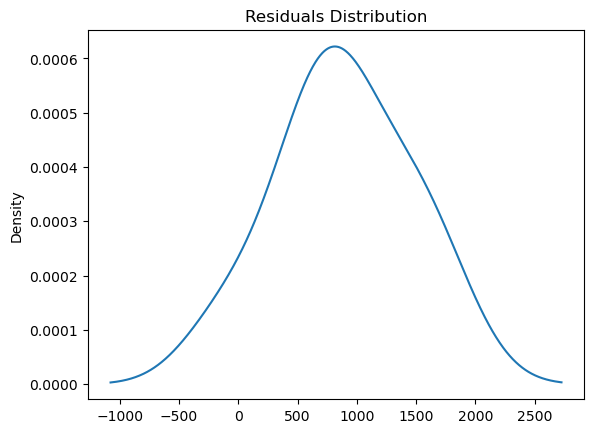

In [106]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

## 6.6.2. ARIMA with First Differencing Data

In [107]:
model = ARIMA(train_data['diff_1'], order=(0,1,1)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

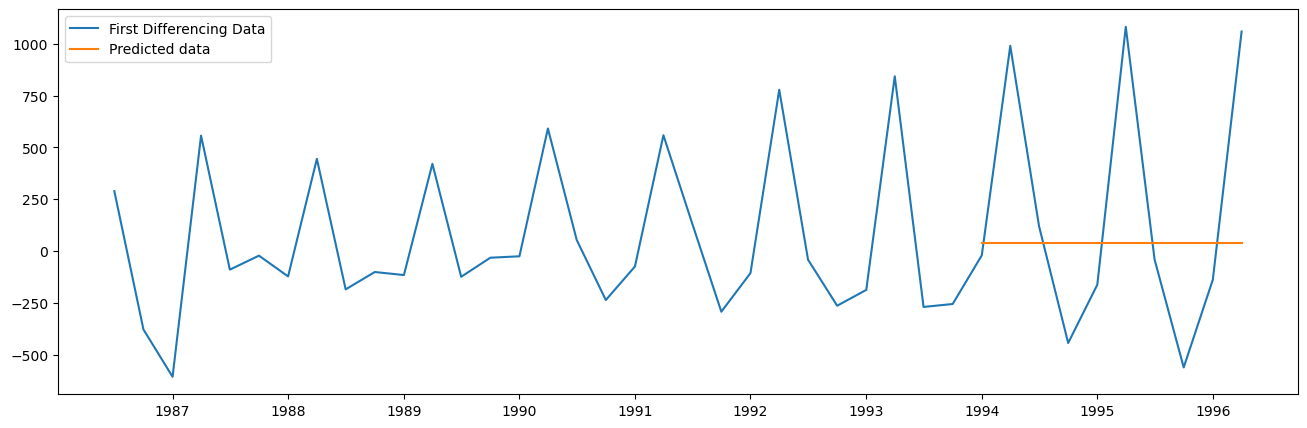

In [108]:
plt.figure(figsize=(16,5))
plt.plot(df1['diff_1'],label='First Differencing Data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

In [109]:
mae_arima_diff_1 = mean_absolute_error(test_data['diff_1'],pred)
rmse_arima_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_arima_diff_1, rmse_arima_diff_1

(469.4918058457759, 609.9708057609901)

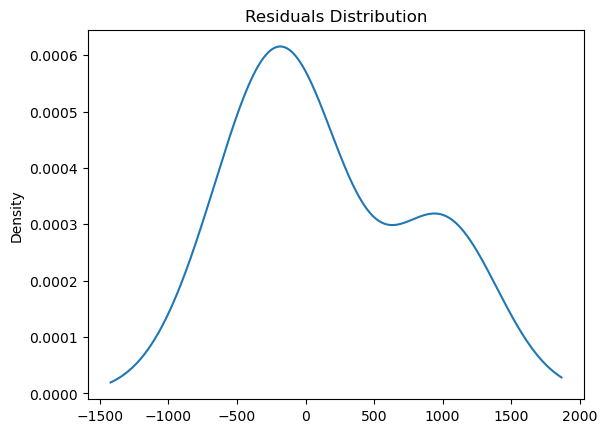

In [110]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

## 6.6.3. ARIMA with Second Differencing Data

In [112]:
model = ARIMA(train_data['diff_2'], order=(0,1,1)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

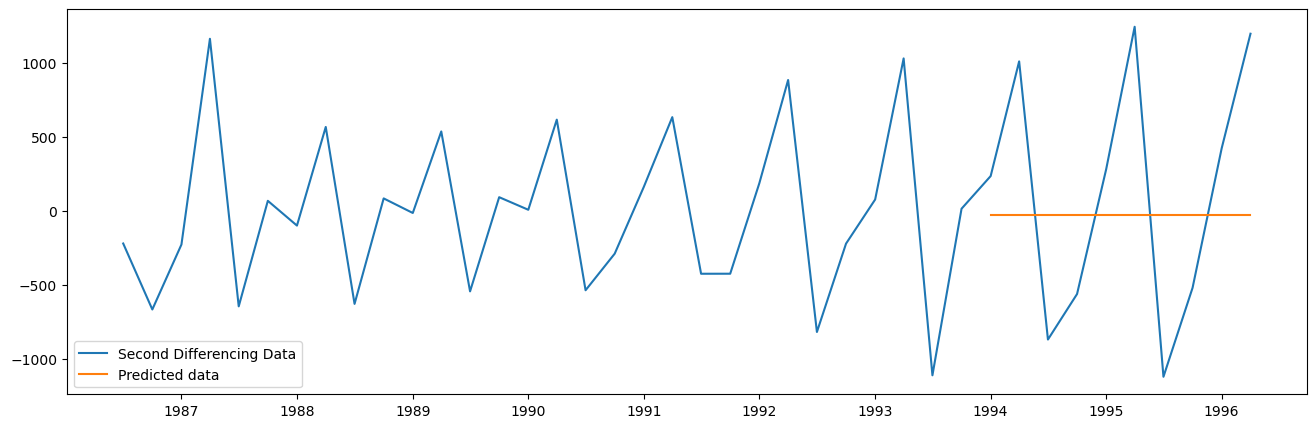

In [113]:
plt.figure(figsize=(16,5))
plt.plot(df1['diff_2'],label='Second Differencing Data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

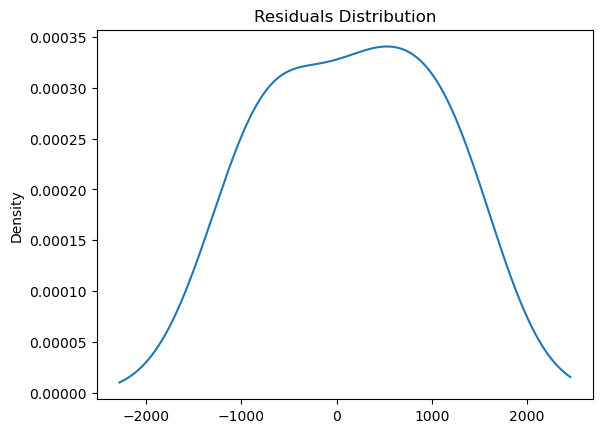

In [114]:
residuals = test_data['diff_2'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

In [115]:
mae_arima_diff_2 = mean_absolute_error(test_data['diff_2'],pred)
rmse_arima_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_arima_diff_2, rmse_arima_diff_2

(752.16743201757, 836.7617013131169)

## 6.7. SARIMAX

## 6.7.1. SARIMAX with Actual Data

In [116]:
model = SARIMAX(train_data['Sales'], order=(0,1,1), seasonal=(2,1,1,5)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

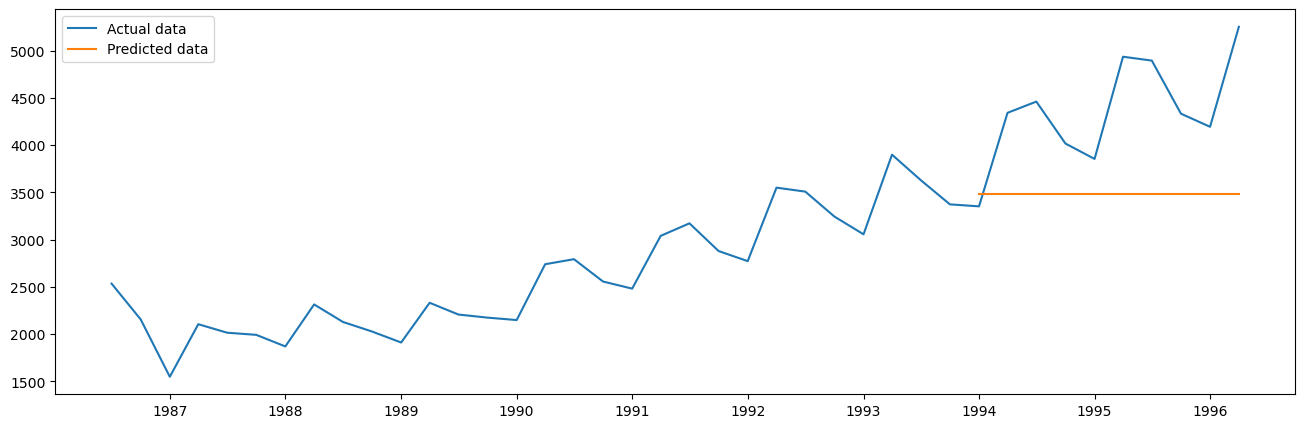

In [117]:
plt.figure(figsize=(16,5))
plt.plot(df1['Sales'],label='Actual data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

In [118]:
mae_sarimax_act = mean_absolute_error(test_data['Sales'],pred)
rmse_sarimax_act = np.sqrt(mean_squared_error(test_data['Sales'], pred))
mae_sarimax_act, rmse_sarimax_act

(910.9721560252572, 1033.9301135057772)

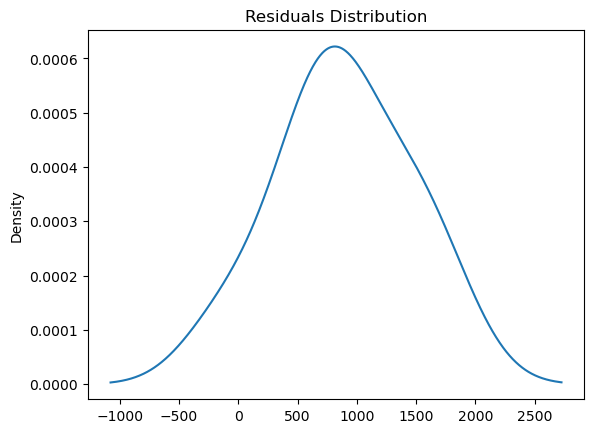

In [119]:
residuals = test_data['Sales'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

## 6.7.2. SARIMAX with First Differencing Data

In [120]:
model = SARIMAX(train_data['diff_1'], order=(0,1,1), seasonal=(2,1,1,5)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

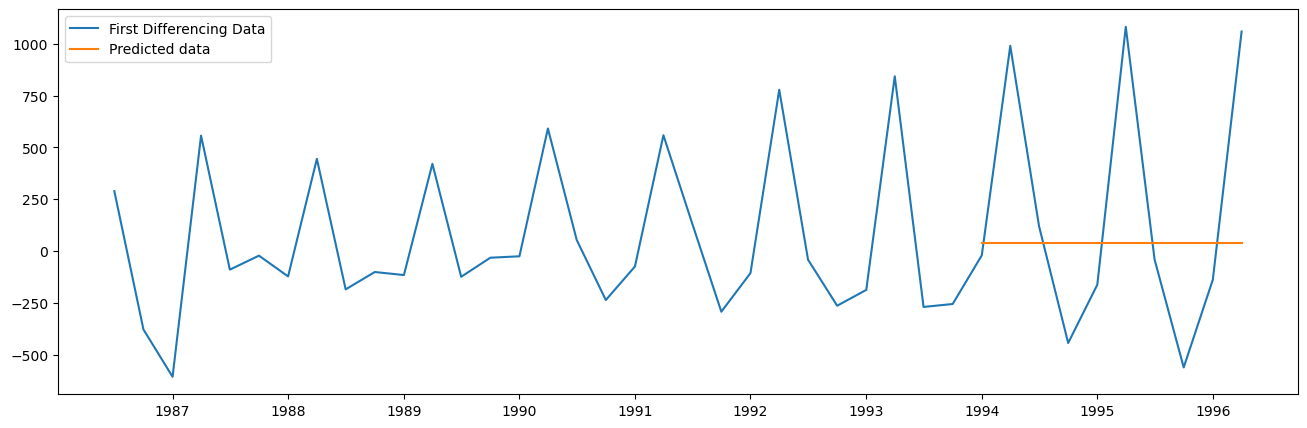

In [121]:
plt.figure(figsize=(16,5))
plt.plot(df1['diff_1'],label='First Differencing Data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

In [122]:
mae_sarimax_diff_1 = mean_absolute_error(test_data['diff_1'],pred)
rmse_sarimax_diff_1 = np.sqrt(mean_squared_error(test_data['diff_1'], pred))
mae_sarimax_diff_1, rmse_sarimax_diff_1

(469.4918058457759, 609.9708057609901)

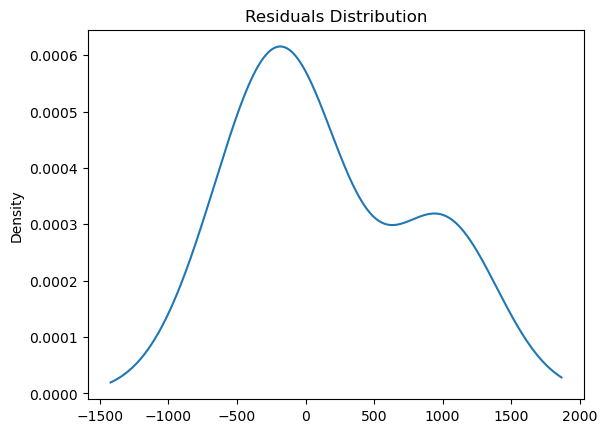

In [123]:
residuals = test_data['diff_1'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

## 6.7.3. SARIMAX with Second Differencing Data

In [124]:
model = SARIMAX(train_data['diff_2'], order=(0,1,1), seasonal=(2,1,1,5)).fit()
pred = model.predict(start=train_len, end=len(df1)-1)

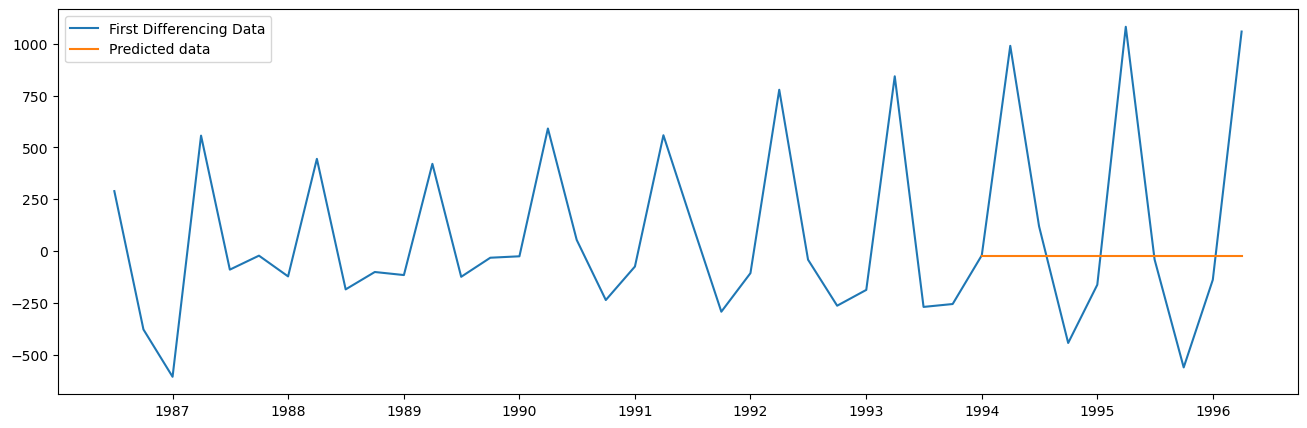

In [125]:
plt.figure(figsize=(16,5))
plt.plot(df1['diff_1'],label='First Differencing Data')
plt.plot(pred, label='Predicted data')
plt.legend()
plt.show()

In [127]:
mae_sarimax_diff_2 = mean_absolute_error(test_data['diff_2'],pred)
rmse_sarimax_diff_2 = np.sqrt(mean_squared_error(test_data['diff_2'], pred))
mae_sarimax_diff_2, rmse_sarimax_diff_2

(752.16743201757, 836.7617013131169)

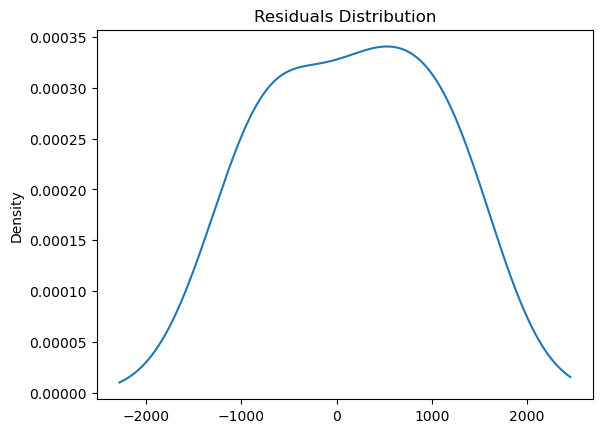

In [128]:
residuals = test_data['diff_2'] - pred
residuals.plot(kind='kde')
plt.title('Residuals Distribution')
plt.show()

# 7. Model Selection

In [133]:
metrics = pd.DataFrame([[rmse_ar_diff_1, rmse_ar_diff_2, rmse_ar_actual,mae_ar_diff_1, mae_ar_diff_2, mae_ar_act],
                        [rmse_arima_diff_1, rmse_arima_diff_2, rmse_arima_actual,rmse_arima_diff_1, mae_arima_diff_2, mae_arima_actual],
                        [rmse_sarimax_diff_1, rmse_sarimax_diff_2, rmse_sarimax_act, mae_sarimax_diff_1, mae_sarimax_diff_2, mae_sarimax_act],
                        [rmse_ses_a_diff_1, rmse_ses_a_diff_2, rmse_ses_a_act, mae_ses_a_diff_1, mae_ses_a_diff_2, mae_ses_a_act],
                        [rmse_des_a_diff_1, rmse_des_a_diff_2, rmse_des_a_actual, mae_des_a_diff1, mae_des_a_diff_2, mae_des_a_actual],
                        [np.nan, np.nan, rmse_tse_m_actual ,np.nan, np.nan, mae_tse_m_actual],
                        [rmse_tse_a_a_diff_1, rmse_tse_a_a_diff_2, rmse_tse_a_a_actual ,mae_tes_a_a_diff_1, mae_tes_a_a_diff_2, mae_tse_a_a_actual]],
                       columns=['diff_1_RMSE','diff_2_RMSE', 'Actual_RMSE' ,'diff_1_MAE','diff_2_MAE', 'Actual_MAE'],
                       index=['AR','ARIMA','SARIMAX','Simple ES','Double ES with Additive trend',
                              'Double ES with Multiplicative trend','Triple ES'])

In [135]:
metrics.sort_values('Actual_RMSE')

,diff_1_RMSE,diff_2_RMSE,Actual_RMSE,diff_1_MAE,diff_2_MAE,Actual_MAE
AR,342.236017,444.505036,332.170754,311.525090,359.028520,300.612415
Double ES with Multiplicative trend,NaN,NaN,477.294863,NaN,NaN,405.313069
Double ES with Additive trend,593.938447,823.368645,574.731517,488.628362,734.004312,465.608173
Triple ES,278.888665,427.611242,645.844939,221.238620,416.073807,587.241590
ARIMA,609.970806,836.761701,1033.930114,609.970806,752.167432,910.972156
SARIMAX,609.970806,836.761701,1033.930114,469.491806,752.167432,910.972156
Simple ES,616.406418,845.701846,1172.083951,464.639982,760.619273,1043.740187


In [136]:
metrics.sort_values('diff_1_RMSE')

,diff_1_RMSE,diff_2_RMSE,Actual_RMSE,diff_1_MAE,diff_2_MAE,Actual_MAE
Triple ES,278.888665,427.611242,645.844939,221.238620,416.073807,587.241590
AR,342.236017,444.505036,332.170754,311.525090,359.028520,300.612415
Double ES with Additive trend,593.938447,823.368645,574.731517,488.628362,734.004312,465.608173
ARIMA,609.970806,836.761701,1033.930114,609.970806,752.167432,910.972156
SARIMAX,609.970806,836.761701,1033.930114,469.491806,752.167432,910.972156
Simple ES,616.406418,845.701846,1172.083951,464.639982,760.619273,1043.740187
Double ES with Multiplicative trend,NaN,NaN,477.294863,NaN,NaN,405.313069


In [142]:
metrics.sort_values('diff_2_RMSE')

,diff_1_RMSE,diff_2_RMSE,Actual_RMSE,diff_1_MAE,diff_2_MAE,Actual_MAE
Triple ES,278.888665,427.611242,645.844939,221.238620,416.073807,587.241590
AR,342.236017,444.505036,332.170754,311.525090,359.028520,300.612415
Double ES with Additive trend,593.938447,823.368645,574.731517,488.628362,734.004312,465.608173
ARIMA,609.970806,836.761701,1033.930114,609.970806,752.167432,910.972156
SARIMAX,609.970806,836.761701,1033.930114,469.491806,752.167432,910.972156
Simple ES,616.406418,845.701846,1172.083951,464.639982,760.619273,1043.740187
Double ES with Multiplicative trend,NaN,NaN,477.294863,NaN,NaN,405.313069


# Conclusion

* When I plotted the actual data then I found data with seasonal and upward trend.
* I trained numbers of time series models to find out which model gives me best result.
* After plotting predicted and test data & checking the model performance with the help of different metrices like mean_absolute_error and root_mean_squared_error then I found Triple Exponential Smoothing performed well on actual, first differencing and second differencing features.
